In [47]:
import pandas as pd
import numpy as np
from dateutil.parser import parse 
import matplotlib as mpl
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm 
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from datetime import datetime
import time
import random
from scipy.interpolate import interp1d
import statsmodels.api as sm
import itertools
from statsmodels.tsa.stattools import adfuller
from numpy import mean
import math
# # 设置中文和负号正常显示
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

### 导入数据

In [48]:
df = pd.read_excel(r"F:\实验室\电网项目\服务器性能数据.xlsx", index_col=0)
df2 = df.copy(deep=True) 

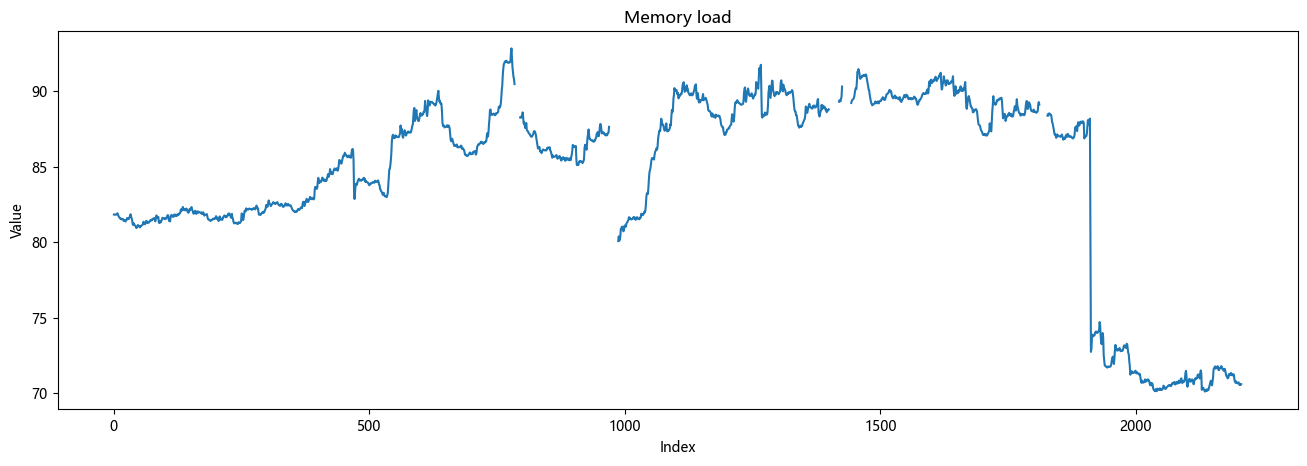

In [49]:
# Draw Plot-----绘图函数
def plot_df(df, x, y, title="", xlabel='Index', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y= df["内存负载"], title='Memory load')

### 缺失值填充

In [50]:
# k近邻法
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n / 2)
            lower = np.max([0, int(i - n_by_2)])
            upper = np.min([len(ts) + 1, int(i + n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

In [51]:
# 使用k-近邻法填补缺失值
df["内存负载"] = knn_mean(df["内存负载"], 24)

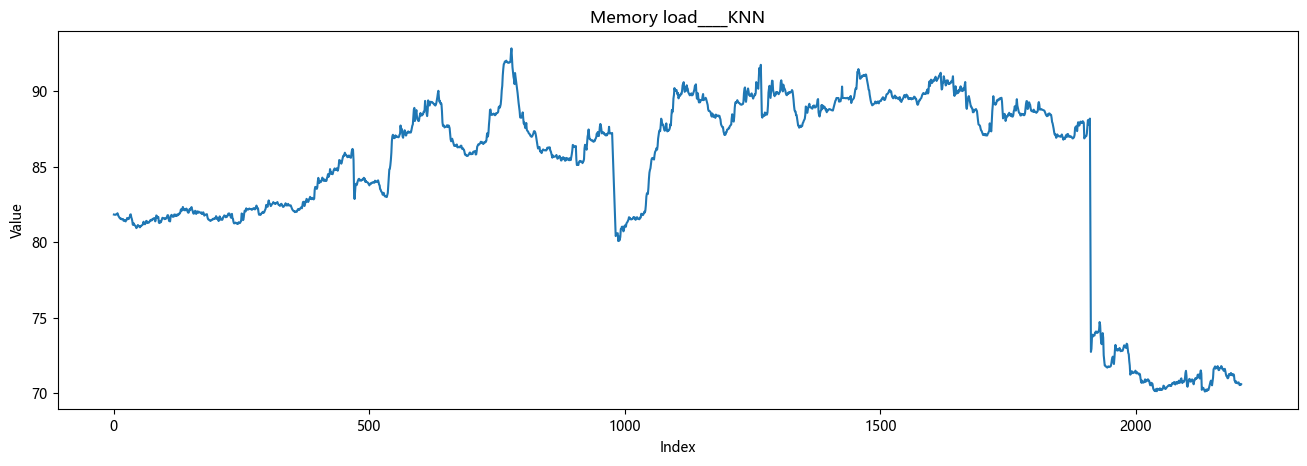

In [52]:
plot_df(df, x=df.index, y= df["内存负载"], title='Memory load____KNN')

In [64]:
# arr = df["内存负载"]
arr = [3.4167    , 3.1667    , 3.9167    , 3.0833    , 3.3333    ,
       3.9167    , 3.5833    , 4.1667    , 3.0833    , 3.4167    ,
       3.0833    , 3.25      , 3.5       , 4.4444    , 4.4167    ,
       6.25      , 4.8182    , 4.25      , 4.1667    , 4.        ,
       3.9167    , 3.75      , 3.1667    , 3.6667    , 3.75      ,
       3.75      , 3.75      , 4.0833    , 3.25      , 3.6667    ,
       3.5       , 3.5       , 3.4167    , 3.3636    , 3.3333    ,
       3.1818    , 3.6667    , 4.3333    , 4.        , 4.0909    ,
       3.5833    , 3.7273    , 3.9091    , 4.0833    , 4.0833    ,
       3.8333    , 3.25      , 3.6667    , 3.6667    , 3.5833    ,
       3.5833    , 3.3333    , 3.3333    , 4.        , 3.75      ,
       3.9167    , 3.0833    , 3.1667    , 3.6364    , 3.4167    ,
       3.25      , 3.8333    , 3.5833    , 3.5833    , 3.3333    ,
       3.75      , 3.4167    , 3.9167    , 3.5833    , 3.7273    ,
       4.0833    , 3.8333    , 3.5833    , 3.6       , 3.5833    ,
       3.25      , 3.3333    , 3.75      , 3.4167    , 3.75      ,
       3.1667    , 3.1667    , 3.4167    , 3.25      , 3.3333    ,
       4.25      , 4.1667    , 4.75      , 4.3       , 3.9167    ,
       3.75      , 3.75      , 4.5       , 3.9167    , 3.8182    ,
       3.9167    , 4.3333    , 3.4167    , 3.4167    , 3.6667    ,
       4.0833    , 3.6667    , 3.6364    , 3.0833    , 3.25      ,
       3.0833    , 3.1667    , 3.75      , 3.4       , 4.5       ,
       5.0909    , 5.25      , 4.75      , 4.1818    , 4.5833    ,
       4.1667    , 4.25      , 4.3636    , 4.1667    , 3.4167    ,
       3.3636    , 3.5       , 3.8333    , 3.75      , 2.25      ,
       2.3333    , 2.1667    , 2.25      , 2.0833    , 2.0833    ,
       2.25      , 2.        , 2.6667    , 3.        , 3.0833    ,
       3.6667    , 2.75      , 2.0833    , 2.75      , 3.4167    ,
       4.0909    , 3.25      , 2.75      , 2.0833    , 2.0833    ,
       2.        , 2.4167    , 2.4167    , 2.25      , 2.3333    ,
       2.2727    , 2.        , 2.1667    , 2.0833    , 2.3636    ,
       2.5       , 2.8182    , 3.5833    , 3.3333    , 3.7273    ,
       3.        , 2.8333    , 3.9       , 4.8333    , 3.5       ,
       3.5833    , 2.8333    , 2.3333    , 2.        , 2.1667    ,
       2.75      , 2.5       , 2.1818    , 2.5833    , 3.5       ,
       2.4167    , 2.        , 2.4167    , 3.3636    , 2.25      ,
       4.8333    , 6.4545    , 5.25      , 4.0833    , 4.        ,
       2.9167    , 4.0833    , 3.4167    , 3.4167    , 3.1667    ,
       3.75      , 2.8333    , 2.1667    , 2.3333    , 2.3636    ,
       2.1667    , 2.0833    , 2.3333    , 2.3333    , 2.6667    ,
       2.0833    , 2.1818    , 2.0909    , 2.0833    , 2.5833    ,
       3.8333    , 3.5455    , 3.3636    , 2.6667    , 2.25      ,
       3.3333    , 3.75      , 4.0833    , 3.1818    , 2.5455    ,
       3.25      , 3.        , 2.4167    , 2.0833    , 2.0833    ,
       2.0833    , 2.25      , 2.25      , 2.0833    , 2.        ,
       2.2727    , 2.0833    , 2.1818    , 2.        , 2.3333    ,
       2.1667    , 2.        , 2.25      , 2.75      , 2.6667    ,
       2.2727    , 2.7273    , 2.3333    , 2.4167    , 2.6667    ,
       2.5       , 2.25      , 2.4167    , 2.5833    , 2.        ,
       2.3333    , 2.3333    , 2.0833    , 2.0833    , 2.3333    ,
       2.25      , 2.6364    , 2.4167    , 3.        , 3.        ,
       3.        , 2.5       , 2.1667    , 2.        , 2.        ,
       2.        , 2.5833    , 2.4167    , 3.        , 2.1667    ,
       2.3636    , 2.1818    , 2.0833    , 2.5       , 3.1667    ,
       2.5       , 2.        , 2.        , 2.0833    , 2.        ,
       2.3333    , 2.2727    , 2.75      , 3.6667    , 3.8182    ,
       2.5833    , 2.4545    , 2.75      , 3.1667    , 3.5833    ,
       3.3333    , 2.5833    , 3.0833    , 2.5       , 2.2727    ,
       2.1667    , 2.1818    , 2.1       , 2.5       , 2.5       ,
       2.0833    , 1.9091    , 2.5       , 2.3333    , 2.25      ,
       2.5833    , 3.1818    , 3.        , 2.8333    , 2.1667    ,
       2.6667    , 2.8333    , 3.9167    , 3.75      , 3.75      ,
       3.3333    , 3.25      , 3.        , 3.7273    , 3.5833    ,
       3.4545    , 2.4167    , 2.7273    , 2.6667    , 3.3333    ,
       2.5       , 2.75      , 2.4545    , 2.75      , 2.75      ,
       4.        , 3.6667    , 3.5       , 2.5833    , 3.25      ,
       4.        , 3.8333    , 3.6667    , 4.5       , 4.1667    ,
       3.75      , 2.6364    , 2.8333    , 2.5       , 2.6667    ,
       2.7273    , 2.75      , 2.9167    , 3.25      , 2.1       ,
       2.4545    , 2.5       , 2.3333    , 2.5       , 3.5       ,
       4.25      , 3.25      , 2.5833    , 2.3636    , 2.75      ,
       3.        , 3.375     , 2.79409286, 2.79139286, 2.79734286,
       2.806     , 2.88933571, 2.87959286, 2.82007143, 2.83197857,
       2.8033    , 2.81304286, 2.0909    , 2.1667    , 2.4167    ,
       2.5833    , 2.4545    , 3.6667    , 3.3636    , 3.4167    ,
       3.4167    , 2.1818    , 2.5       , 3.75      , 4.6667    ,
       3.1667    , 2.9167    , 2.8333    , 2.3333    , 2.75      ,
       2.4167    , 2.5       , 2.1667    , 2.2727    , 2.5       ,
       2.5833    , 2.4167    , 2.25      , 2.5455    , 2.9167    ,
       2.75      , 2.75      , 3.75      , 3.6667    , 4.0833    ,
       3.6667    , 3.        , 3.5833    , 3.0833    , 3.5833    ,
       3.        , 2.8333    , 2.5833    , 2.25      , 2.2       ,
       2.4167    , 2.4545    , 2.1667    , 2.5       , 2.5       ,
       2.        , 1.9091    , 2.3333    , 2.5833    , 2.3636    ,
       3.5833    , 3.9167    , 5.25      , 5.6667    , 4.25      ,
       5.3333    , 4.75      , 4.3333    , 4.0833    , 2.9167    ,
       3.1667    , 3.1667    , 2.4167    , 2.2727    , 2.1667    ,
       2.25      , 2.1667    , 2.5833    , 2.5833    , 2.4167    ,
       2.2727    , 2.3333    , 2.9167    , 2.5455    , 2.6667    ,
       2.8333    , 3.4167    , 2.8333    , 2.8333    , 3.5833    ,
       3.9167    , 3.5       , 3.        , 2.8333    , 2.8333    ,
       2.9167    , 2.4545    , 3.        , 2.4167    , 2.25      ,
       2.4167    , 2.4167    , 2.4545    , 2.25      , 2.1667    ,
       2.3636    , 2.5833    , 2.75      , 3.75      , 5.5833    ,
       4.5       , 3.25      , 2.6667    , 3.1667    , 3.0833    ,
       3.25      , 2.9167    , 2.8182    , 3.1667    , 4.4167    ,
       2.75      , 2.75      , 2.6364    , 2.6667    , 2.3333    ,
       2.7273    , 2.5833    , 2.6667    , 2.0833    , 2.25      ,
       2.4167    , 2.25      , 2.5833    , 3.4167    , 4.25      ,
       3.        , 2.6667    , 2.75      , 3.5455    , 4.1667    ,
       5.4167    , 4.6667    , 3.        , 2.7273    , 2.8333    ,
       2.4167    , 2.25      , 2.0833    , 2.25      , 2.4545    ,
       2.25      , 1.9167    , 2.0833    , 2.25      , 2.5833    ,
       2.25      , 2.75      , 3.0833    , 3.4545    , 4.3333    ,
       3.        , 2.4167    , 3.5       , 5.25      , 5.9167    ,
       4.3333    , 3.4545    , 2.5       , 2.25      , 2.3333    ,
       2.75      , 2.25      , 2.1818    , 2.4167    , 2.3333    ,
       1.5833    , 2.        , 2.1818    , 2.6667    , 2.25      ,
       3.        , 2.5       , 2.3428    , 2.30578182, 2.31136   ,
       2.32575556, 2.3143875 , 2.31168571, 2.39718571, 2.39718571,
       2.42315714, 2.33981429, 2.37552857, 2.48267143, 2.5422    ,
       2.6515125 , 2.75504444, 2.84621   , 2.87534545, 2.1818    ,
       2.        , 2.3636    , 2.0833    , 2.5       , 3.75      ,
       2.9167    , 3.4167    , 3.5833    , 3.6667    , 3.1667    ,
       4.1667    , 4.1667    , 4.1667    , 3.8333    , 3.9167    ,
       3.75      , 3.75      , 3.0833    , 3.        , 2.75      ,
       3.9167    , 3.3333    , 3.5       , 3.1667    , 3.        ,
       3.        , 3.0833    , 2.3333    , 2.5       , 3.3333    ,
       4.        , 3.8333    , 3.5       , 3.5       , 4.5       ,
       3.9167    , 4.25      , 4.1667    , 3.8333    , 3.9091    ,
       3.75      , 3.5       , 3.25      , 3.1667    , 3.4167    ,
       3.5833    , 3.5       , 2.8333    , 3.        , 3.5       ,
       3.75      , 4.0833    , 3.75      , 4.4167    , 5.3636    ,
       4.5833    , 3.3636    , 4.0833    , 4.0909    , 4.9091    ,
       5.        , 4.5833    , 4.        , 4.4167    , 3.5833    ,
       4.25      , 3.75      , 3.25      , 3.3333    , 3.3333    ,
       3.5       , 2.8333    , 2.9167    , 3.1667    , 3.3333    ,
       3.25      , 3.5       , 4.5       , 4.        , 4.        ,
       3.25      , 3.1667    , 4.1667    , 4.4167    , 4.1818    ,
       4.9091    , 4.5       , 4.3333    , 4.5455    , 3.4545    ,
       3.5       , 3.5       , 4.2       , 4.        , 3.5       ,
       3.75      , 3.        , 3.3333    , 3.4167    , 3.6364    ,
       4.0833    , 5.5       , 5.6667    , 8.3333    , 8.0833    ,
       6.3333    , 5.8333    , 6.3333    , 6.5       , 7.6667    ,
       4.6667    , 5.3333    , 4.5       , 4.        , 3.4167    ,
       3.25      , 3.5833    , 4.        , 4.        , 4.        ,
       3.3333    , 3.5       , 3.8182    , 4.4167    ]
arr2 = pd.DataFrame(arr)
train = arr2[:-12]
test = arr2[-12:].values
len(train.values)

672

In [65]:
# 定阶后的单步预测
model = sm.tsa.ARIMA(train.values, order=(7, 1, 4))
result = model.fit()
forecast, stderr, conf = result.forecast(12)
forecast

D:\Softwore\python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
D:\Softwore\python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


array([5.16782735, 5.3866146 , 4.94573817, 5.02681084, 4.62017102,
       4.78030978, 4.47864335, 4.73158154, 4.53297492, 4.87231827,
       4.76276479, 5.16458204])

In [67]:
predict = forecast
truth =  test

In [69]:
MSEs = []
errors = []
MAPEs = []
for i in range(12):
    error = abs(predict[i] - truth[i])
    errors.append(error)
    MSEs.append(error**2)
    MAPEs.append((error/truth[i])*100)
MSE = np.mean(MSEs)
MAPE = np.mean(MAPEs)

In [71]:
MAPE

28.708315197687014

In [70]:
MSE

1.257167610425767

In [59]:
# top = []
# bottom = []
# for data in conf:
#     top.append(data[1])
#     bottom.append(data[0])

In [60]:
# from scipy.stats import norm
# from collections import deque
# const = norm.ppf(1 - 0.05 / 2.)
# samples_in = deque(train[2046-385:].values)

In [61]:
# samples_mean = np.mean(samples_in)
# samples_std = np.std(samples_in_,ddof=1)

In [62]:
# # a = 总体平均值 - Z*标准误差
# top = []
# bottom = []
# for i in range(12):
#     samples_mean = np.mean(samples_in)
#     samples_std = np.std(samples_in,ddof=1)
#     a = forecast[i] - const * (samples_std / np.sqrt(80))* np.sqrt(i+1)
#     b = forecast[i] + const * (samples_std / np.sqrt(80))* np.sqrt(i+1)
#     top.append(b)
#     bottom.append(a)
    
#     samples_in.popleft()
#     samples_in.append(forecast[i])

In [106]:
# # 迭代预测方法
# train_temp = train
# error = []
# truth = []
# for i in range(12):
#     if len(error) != 0:
# #         train_temp = train_temp[1:].append(pd.Series(error[i-1]))
#         train_temp = train_temp.append(pd.Series(error[i-1]))
# #         print(train_temp)
#     model = sm.tsa.ARIMA(train_temp, order=(0, 1, 4))
#     result = model.fit()
#     te = result.forecast()[0]
#     error.append(te[0])
# error

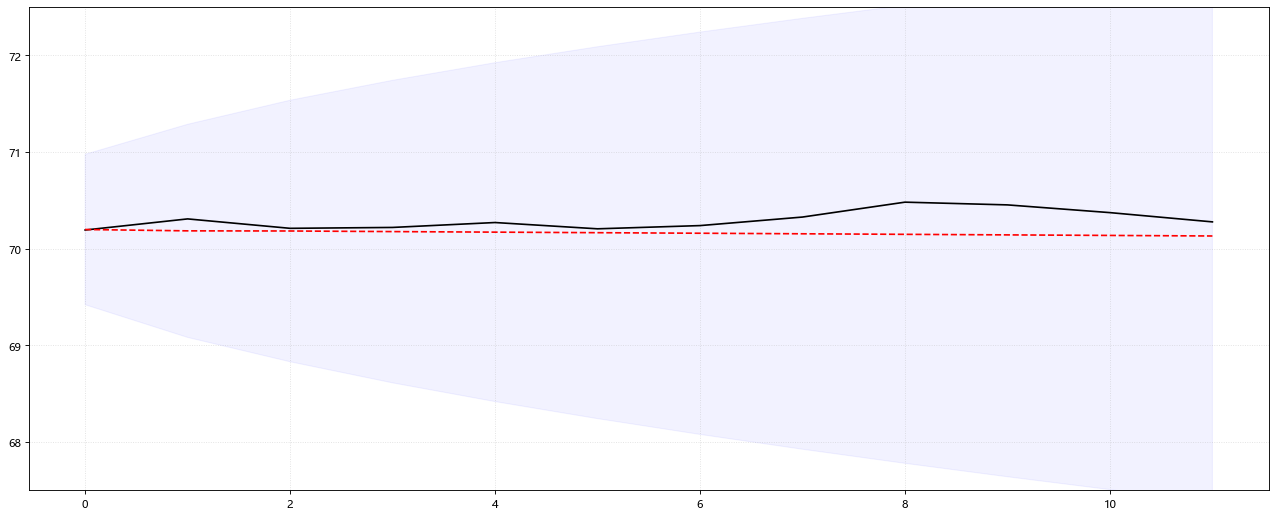

In [107]:
y_1 = df["内存负载"][2046:2058]
# 迭代策略
# 模型输入数据集长度不变
y_2 = forecast
# 模型过去一周训练,变长预测
# y_3 = temp2
# # 直接策略
# y_3 = [88.76133487,88.67568213,88.80482849,
#        88.82377398,89.87014746,89.68174806,90.31510764,88.94456323,89.2641398,89.53729765]
# # 神经网络
# y_4 = [88.5779,88.3317,88.394,88.3592,88.4777,88.8119,88.843,89.0937,88.8181,88.6788]
x = range(12)
 
#设置图形大小
plt.figure(figsize=(20,8),dpi=80)
# color可以百度颜色代码
plt.plot(x,y_1,label="truth",color="black")
plt.plot(x,y_2,label="pre1",color="red",linestyle="--")
plt.fill_between(x,top,bottom,color='blue',alpha=0.05)
# plt.plot(x,y_3,label="pre2",color="blue",linestyle="--")
plt.ylim(67.5,72.5)
#绘制网格
plt.grid(alpha=0.4,linestyle=':')

#展示
plt.show()

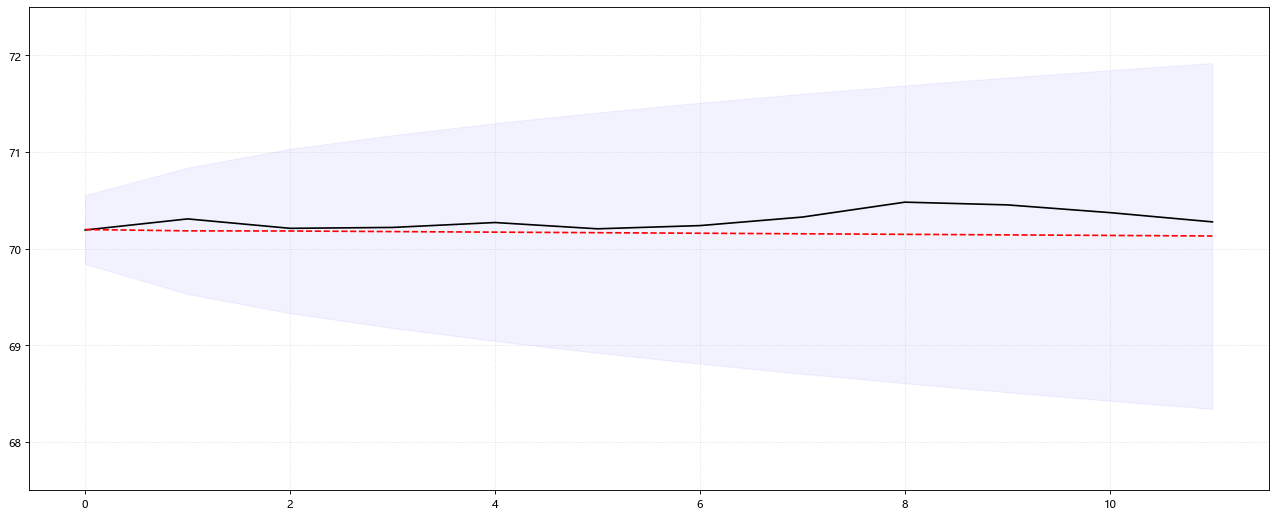

In [99]:
y_1 = df["内存负载"][2046:2058]
# 迭代策略
# 模型输入数据集长度不变
y_2 = forecast
# 模型过去一周训练,变长预测
# y_3 = temp2
# # 直接策略
# y_3 = [88.76133487,88.67568213,88.80482849,
#        88.82377398,89.87014746,89.68174806,90.31510764,88.94456323,89.2641398,89.53729765]
# # 神经网络
# y_4 = [88.5779,88.3317,88.394,88.3592,88.4777,88.8119,88.843,89.0937,88.8181,88.6788]
x = range(12)
 
#设置图形大小
plt.figure(figsize=(20,8),dpi=80)
# color可以百度颜色代码
plt.plot(x,y_1,label="truth",color="black")
plt.plot(x,y_2,label="pre1",color="red",linestyle="--")
plt.fill_between(x,top,bottom,color='blue',alpha=0.05)
# plt.plot(x,y_3,label="pre2",color="blue",linestyle="--")
plt.ylim(67.5,72.5)
#绘制网格
plt.grid(alpha=0.4,linestyle=':')

#展示
plt.show()

In [18]:
MSEs = []
errors = []
MAPEs = []
for i in range(12):
    err =  df["内存负载"].loc[2046+i] - forecast[i]
    errors.append(err)
    MAPEs.append(abs(err/df["内存负载"].loc[2046+i])*100)
    MSEs.append((err)**2)
MSE = mean(MSEs)
RMSE = math.sqrt(MSE)
RMSE

0.1707491872290476

In [19]:
MAPE = mean(MAPEs)
MAPE

0.19142081087938298

In [20]:
MAPEs

[0.007310163978150343,
 0.17582729169180158,
 0.03922338272575531,
 0.06115158033050771,
 0.14149238784758486,
 0.05713731413084948,
 0.1126163387078312,
 0.24625974526842928,
 0.4724306516395314,
 0.4405229809670573,
 0.33542364362624666,
 0.20765424963885068]

In [21]:
errors

[-0.0051311868503631786,
 0.12361977310621342,
 0.0275387370117528,
 0.042940150495439866,
 0.09942670094049788,
 0.040113251385562876,
 0.0790998018306226,
 0.17318635227569246,
 0.33297290272075486,
 0.31035945316581603,
 0.23604600361088046,
 0.14593255405594618]

In [15]:
return

SyntaxError: 'return' outside function (<ipython-input-15-9b32c1431b19>, line 1)

### 差分

In [25]:
# 差分法生成序列
dif = []
dif = train.diff(1)

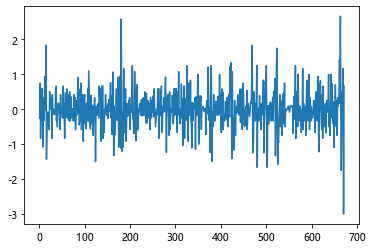

In [26]:
plt.plot(dif)

In [27]:
type(dif)

pandas.core.frame.DataFrame

### ADF检验

In [28]:
timeSeries = dif[1:]
adftest = ts.adfuller(timeSeries)
adftest

(-10.567649423884605,
 7.444951485071838e-19,
 20,
 650,
 {'1%': -3.4404504809576695,
  '5%': -2.8659967824852073,
  '10%': -2.569143417751479},
 972.4510641854251)

### 白噪声检验

In [29]:
acorr_ljungbox(timeSeries, lags=1)

D:\Softwore\python38\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([5.86656967]), array([0.01543109]))

In [30]:
# 一阶差分后p值远小于0.05,因此差分后的序列是平稳非白噪声序列

<ipython-input-31-76021bd838cb>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(timeSeries).show()


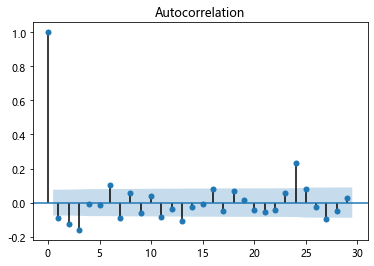

In [31]:
plot_acf(timeSeries).show()

<ipython-input-32-6211f80bbc7a>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(timeSeries).show()


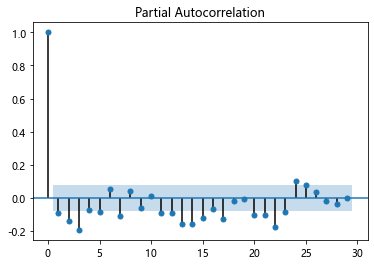

In [32]:
plot_pacf(timeSeries).show()

In [33]:
timeSeries

,0
1,-0.2500
2,0.7500
3,-0.8334
4,0.2500
5,0.5834
...,...
667,0.5000
668,0.1667
669,1.1667
670,-3.0000


### ACF定阶

In [34]:
#画图定阶

In [35]:
# ACF和PACF定阶
#利用ACF和PACF判断模型阶数
# plot_acf(arr).show() #延迟数

In [36]:
# plot_pacf(arr).show()

In [37]:
#设置遍历循环的初始条件，以热力图的形式展示，跟AIC定阶作用一样
p_min = 3
q_min = 3
p_max = 12
q_max = 12
d_min = 0
d_max = 1

In [38]:
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
results_bic

,MA3,MA4,MA5,MA6,MA7,MA8,MA9,MA10,MA11,MA12
AR3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
import statsmodels.api as sm
import itertools
import seaborn as sns

In [40]:
# timeSeries = pd.Series(arr)
# type(timeSeries)

循环2次
循环3次
循环4次
循环5次
循环6次
循环7次
循环8次
循环9次
循环10次
循环11次
循环12次
循环13次


D:\Softwore\python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
D:\Softwore\python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


循环14次


D:\Softwore\python38\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Softwore\python38\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Softwore\python38\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Softwore\python38\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


循环15次


D:\Softwore\python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


循环16次
循环17次
循环18次
循环19次


Text(0.5, 1.0, 'BIC')

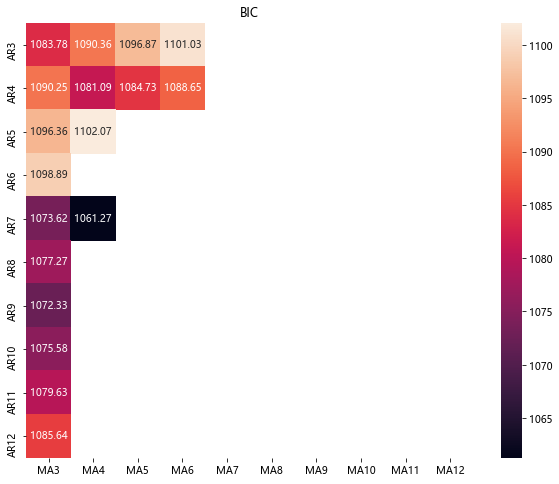

In [41]:
num = 1
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
 
    try:
        model = sm.tsa.ARIMA(timeSeries, order=(p, d, q),
#                                enforce_stationarity=False,
#                                enforce_invertibility=False,
                              )
        results = model.fit()
        num += 1
        print(f"循环{num}次")
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')

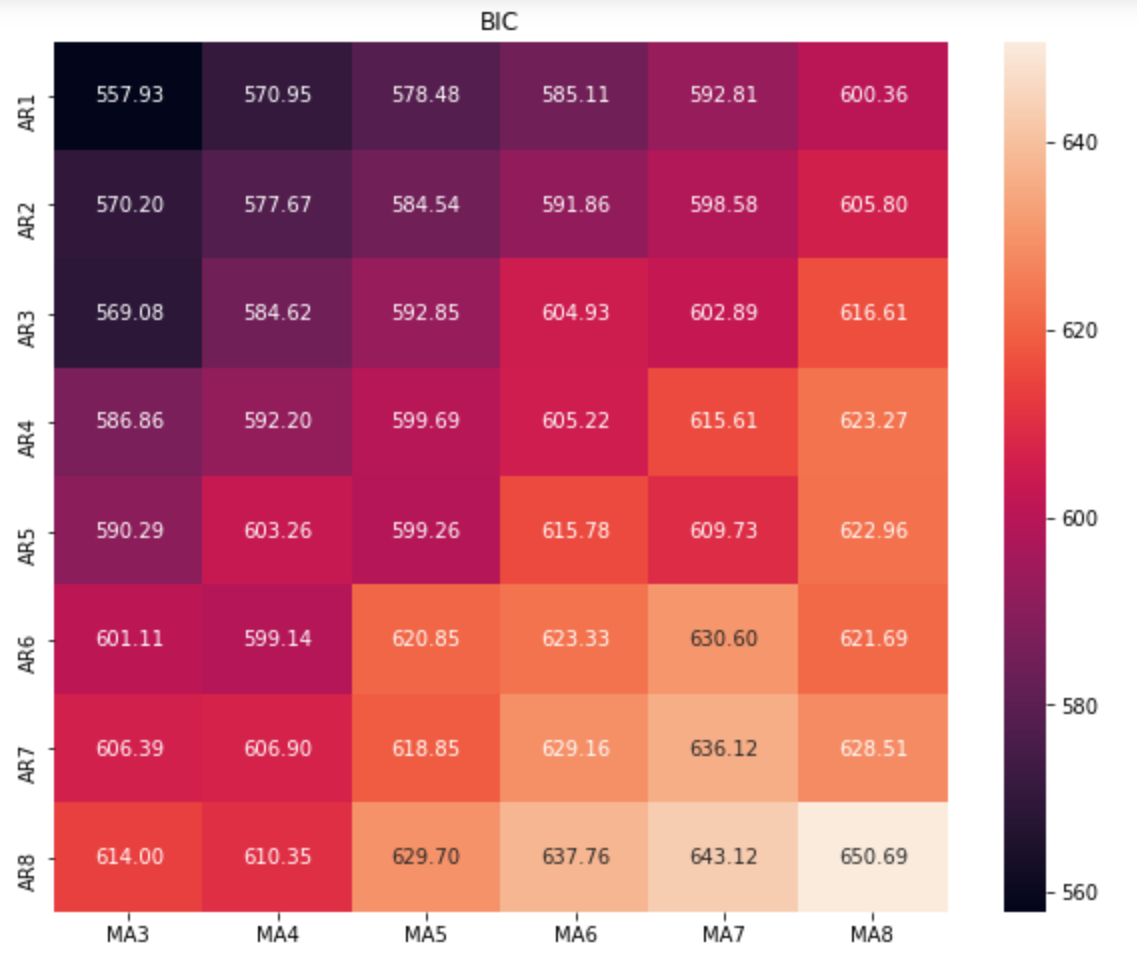

### LB残差检验

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test

In [ ]:
result = lb_test(timeSeries, lags=12)
print(result[1])

In [ ]:
plt.plot(range(len(result[1])), result[1])

In [ ]:
model = sm.tsa.ARIMA(df["内存负载"], order=(1, 1, 2))
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)

In [ ]:
model = sm.tsa.ARIMA(df["内存负载"], order=(1, 1, 2))
result = model.fit()

In [ ]:
result.forecast()[0]

In [ ]:
import matplotlib
print(matplotlib.get_configdir())